# Load Data


In [1]:
import pandas as pd
import zipfile

In [2]:
zf = zipfile.ZipFile('./berlin-airbnb-data.zip')

file_names = zf.namelist()


calendar_summary = pd.read_csv(zf.open(file_names[0]))

listings = pd.read_csv(zf.open(file_names[1]))

listings_summary = pd.read_csv(zf.open(file_names[2]))

neighbourhoods = pd.read_csv(zf.open(file_names[3]))

reviews = pd.read_csv(zf.open(file_names[4]))

reviews_summary = pd.read_csv(zf.open(file_names[5]))

In [3]:
listings_summary.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42


In [4]:
calendar_summary.shape , listings.shape, listings_summary.shape

((8231480, 4), (22552, 16), (22552, 96))

In [5]:
neighbourhoods.shape, reviews.shape, reviews_summary.shape

((139, 2), (401963, 2), (401963, 6))

# Calendar_summary


In [6]:
calendar_summary.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [7]:
calendar_summary.isnull().sum()

listing_id          0
date                0
available           0
price         6430639
dtype: int64

In [8]:
6430639/8231480
# Calendar_summary, in the column price we have (6,430,639) observations with null values
# that means that 78% is null. Only available days have values.

0.7812251259797752

In [9]:
calendar_summary.head()

,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN
3,2015,2019-09-07,f,NaN
4,2015,2019-09-06,f,NaN


In [10]:
#Change available to boolean 
calendar_summary['available'].value_counts()

f    6430639
t    1800841
Name: available, dtype: int64

In [11]:
calendar_summary['available']= calendar_summary['available'].replace({'f': False, 't': True})

In [12]:
calendar_summary['available'].value_counts()

False    6430639
True     1800841
Name: available, dtype: int64

In [13]:
#remove $ and convert to int
calendar_summary['price'].value_counts()

$50.00       68088
$40.00       63537
$35.00       60185
$45.00       56931
$55.00       51832
             ...  
$859.00          1
$2,142.00        1
$985.00          1
$572.00          1
$503.00          1
Name: price, Length: 684, dtype: int64

In [14]:
calendar_summary['price'] = calendar_summary['price'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
calendar_summary['date'] = pd.to_datetime(calendar_summary['date'])

In [16]:
calendar_summary.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

In [17]:
# The price in calendar summary is different to the price in listings
calendar_summary[(calendar_summary['listing_id']==2015) & (calendar_summary['available'] == True) ]

,listing_id,date,available,price
128,2015,2019-05-05,True,76.0
129,2015,2019-05-04,True,76.0
130,2015,2019-05-03,True,76.0
131,2015,2019-05-02,True,76.0
132,2015,2019-05-01,True,78.0
...,...,...,...,...
264,2015,2018-12-20,True,76.0
265,2015,2018-12-19,True,76.0
266,2015,2018-12-18,True,76.0
267,2015,2018-12-17,True,76.0


In [18]:
calendar_summary[(calendar_summary['listing_id']==2015)]['price'].value_counts()

76.0     100
77.0      20
78.0      14
188.0      7
Name: price, dtype: int64

# listings

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [21]:
listings.isnull().sum()

id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [22]:
listings.head(1).T

,0
id,2015
name,Berlin-Mitte Value! Quiet courtyard/very central
host_id,2217
host_name,Ian
neighbourhood_group,Mitte
neighbourhood,Brunnenstr. Süd
latitude,52.5345
longitude,13.4026
room_type,Entire home/apt
price,60


# listings_summary

In [23]:
pd.set_option('display.max_rows', None)
listings_summary.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                       float64
medium_url                          float64
picture_url                          object
xl_picture_url                      float64
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [24]:
listings_summary.isnull().sum()

id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                   59
summary                               963
space                                8532
description                           203
experiences_offered                     0
neighborhood_overview               11012
notes                               15337
transit                              9516
access                              11715
interaction                         12146
house_rules                         11103
thumbnail_url                       22552
medium_url                          22552
picture_url                             0
xl_picture_url                      22552
host_id                                 0
host_url                                0
host_name                              26
host_since                             26
host_location                     

In [25]:
listings_summary['neighbourhood_group_cleansed'][:5]

0                     Mitte
1                    Pankow
2                    Pankow
3    Tempelhof - Schöneberg
4                    Pankow
Name: neighbourhood_group_cleansed, dtype: object

In [26]:
listings_summary['square_feet'].isnull().sum()

22106

In [27]:
len(listings_summary)

22552

In [28]:
listings_summary['description'][:10]

0    Great location!  30 of 75 sq meters. This wood...
1    In the summertime we are spending most of our ...
2    This beautiful first floor apartment  is situa...
3    First of all: I prefer short-notice bookings. ...
4    Cozy and large room in the beautiful district ...
5    4 bedroom with very large windows and outstand...
6    The apartment is located on the upper second f...
7    Hello future guests! We want to rent our cute ...
8    Light and sunny 2-Room-turn of the century-fla...
9    The 25 sqm room is located in the heart of Ber...
Name: description, dtype: object

### Before check correlation , we'll change the format of some columns

In [29]:
#Replace f, t by false and true
listings_summary['host_is_superhost']= listings_summary['host_is_superhost'].replace({'f': False, 't': True})
listings_summary['host_has_profile_pic']= listings_summary['host_has_profile_pic'].replace({'f': False, 't': True})
listings_summary['host_identity_verified']= listings_summary['host_identity_verified'].replace({'f': False, 't': True})
listings_summary['has_availability']= listings_summary['has_availability'].replace({'f': False, 't': True})
listings_summary['instant_bookable']= listings_summary['instant_bookable'].replace({'f': False, 't': True})
listings_summary['is_business_travel_ready']= listings_summary['is_business_travel_ready'].replace({'f': False, 't': True})
listings_summary['require_guest_profile_picture']= listings_summary['require_guest_profile_picture'].replace({'f': False, 't': True})
listings_summary['require_guest_phone_verification']= listings_summary['require_guest_phone_verification'].replace({'f': False, 't': True})

In [30]:
listings_summary['host_is_superhost'][:10]

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9     True
Name: host_is_superhost, dtype: object

In [31]:
# change to date
listings_summary['host_since'] = pd.to_datetime(listings_summary['host_since'])

In [32]:
# listings_summary['host_listings_count'] = listings_summary['host_listings_count'].astype(int)
# listings_summary['host_total_listings_count'] = listings_summary['host_total_listings_count'].astype(int)
# listings_summary['zipcode'] = listings_summary['zipcode'].astype(int)

In [33]:
#Change string to int in prices
listings_summary['price'] = listings_summary['price'].replace('[\$,]', '', regex=True).astype(float)
listings_summary['extra_people'] = listings_summary['extra_people'].replace('[\$,]', '', regex=True).astype(float)

In [34]:
list_neighborhood = listings_summary['neighbourhood_cleansed'].value_counts()

## Check correlation between the features

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

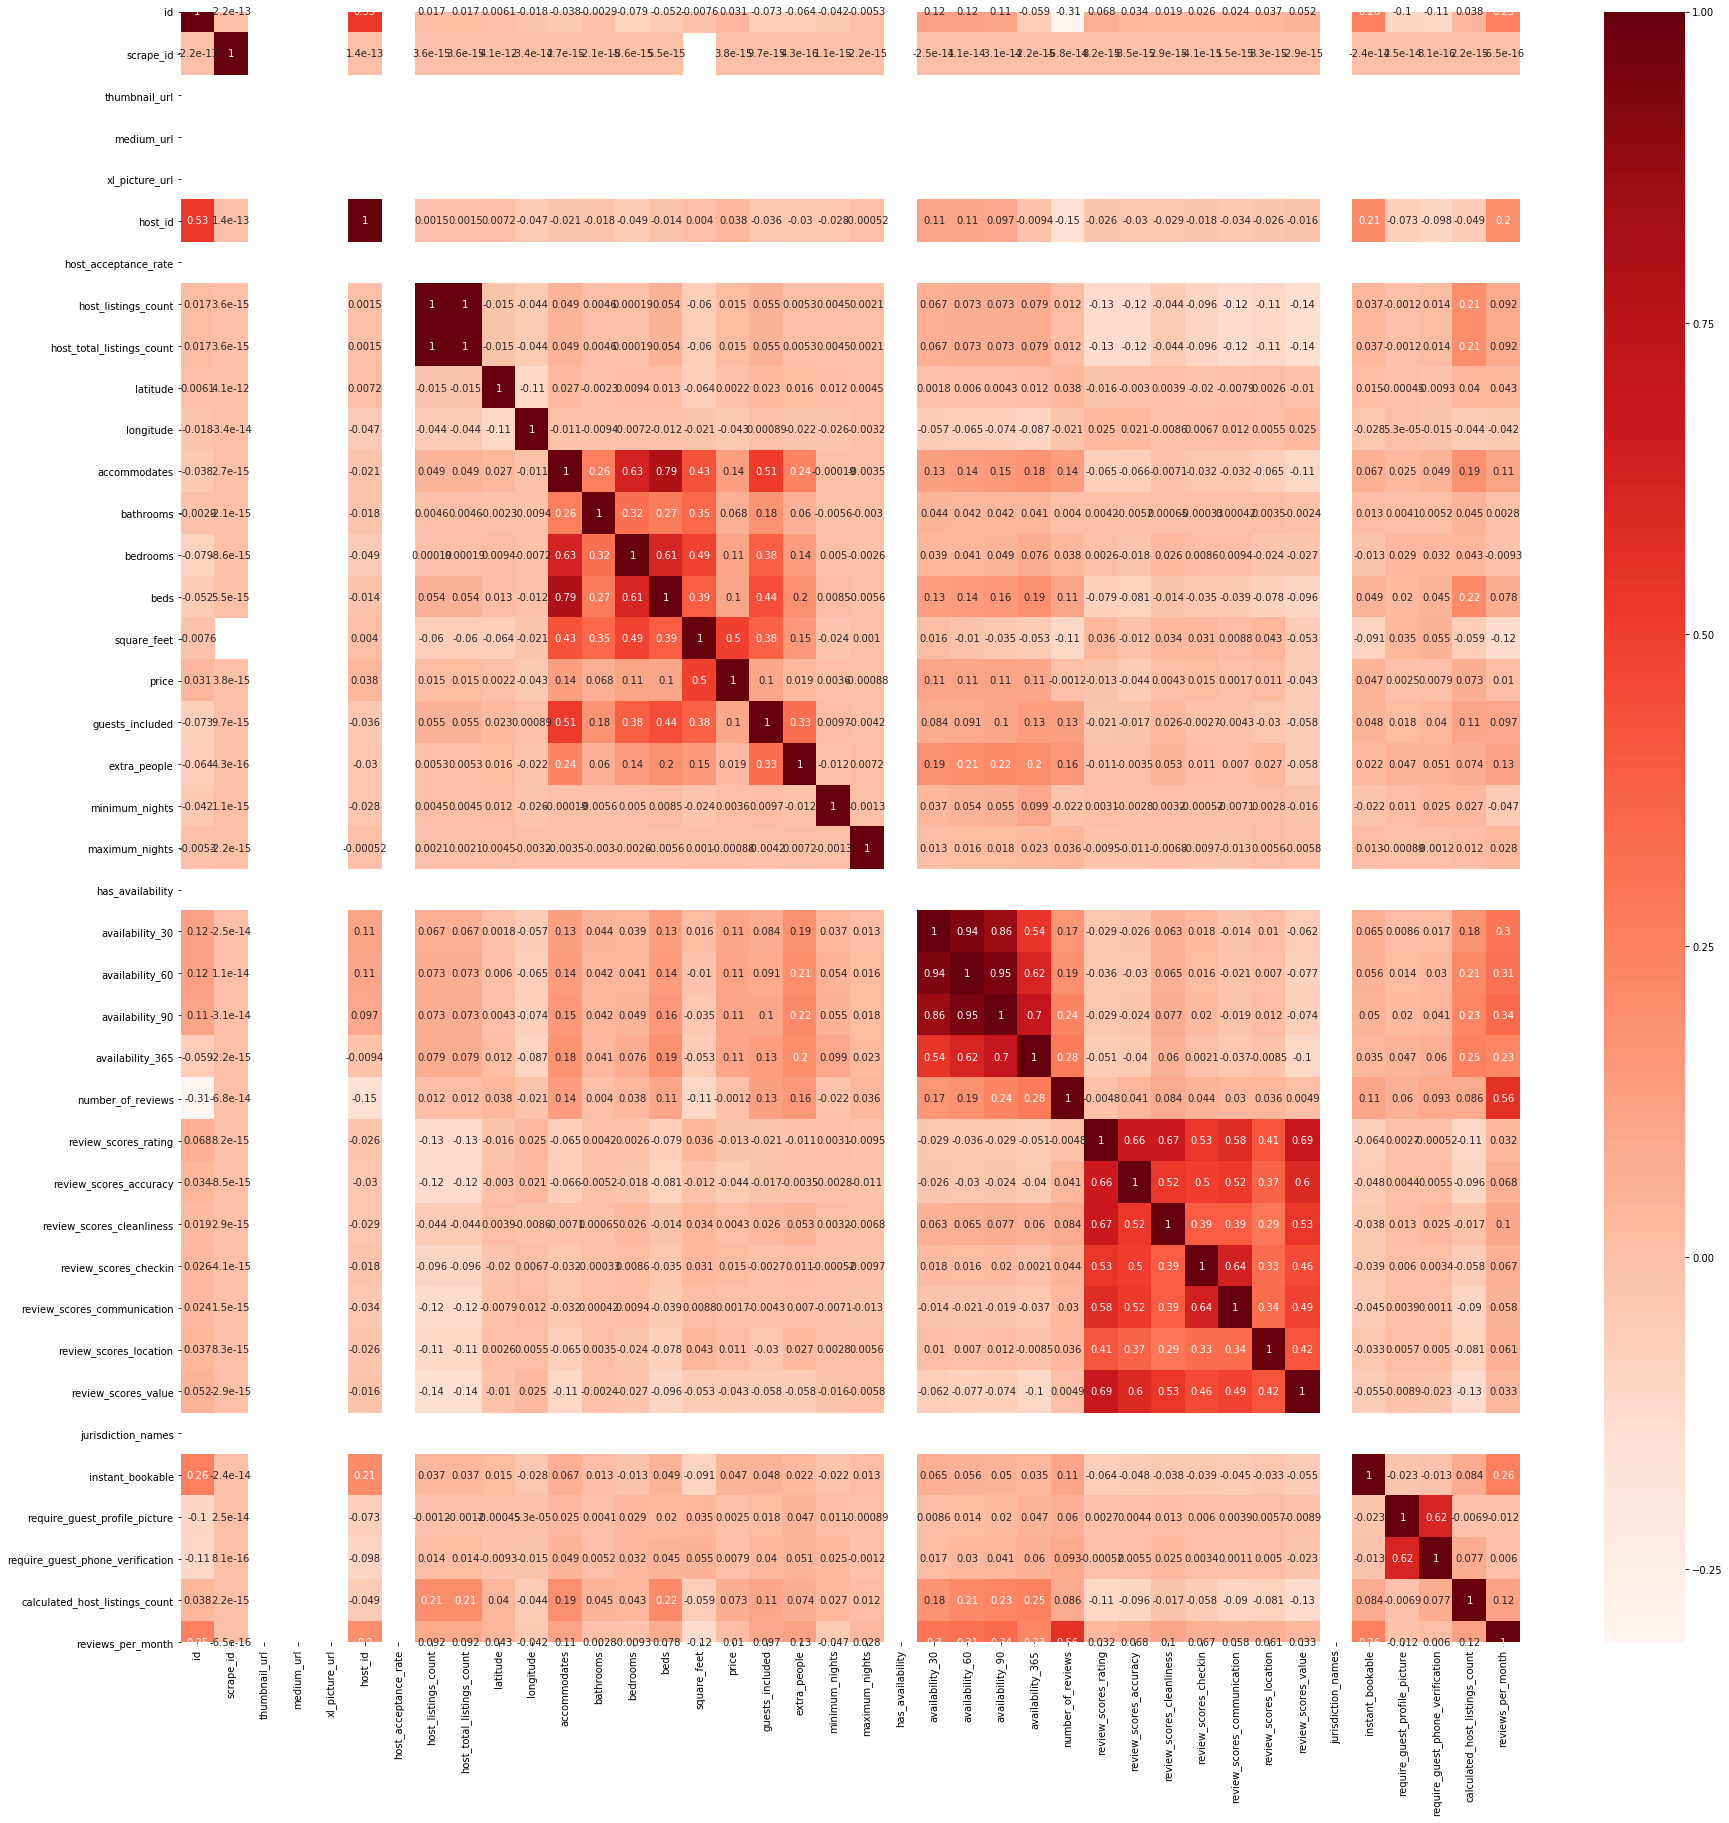

In [36]:
plt.figure(figsize=(30,30))
cor = listings_summary.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [37]:
data_listings = listings_summary

In [38]:
columns_to_keep = ['host_is_superhost', 'description', 'neighbourhood_group_cleansed', 
                   'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'price', 'cleaning_fee', 
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
                   'instant_bookable', 'is_business_travel_ready', 'cancellation_policy']

In [39]:
data_listings= data_listings[columns_to_keep]

In [40]:
data_listings.shape

(22552, 21)

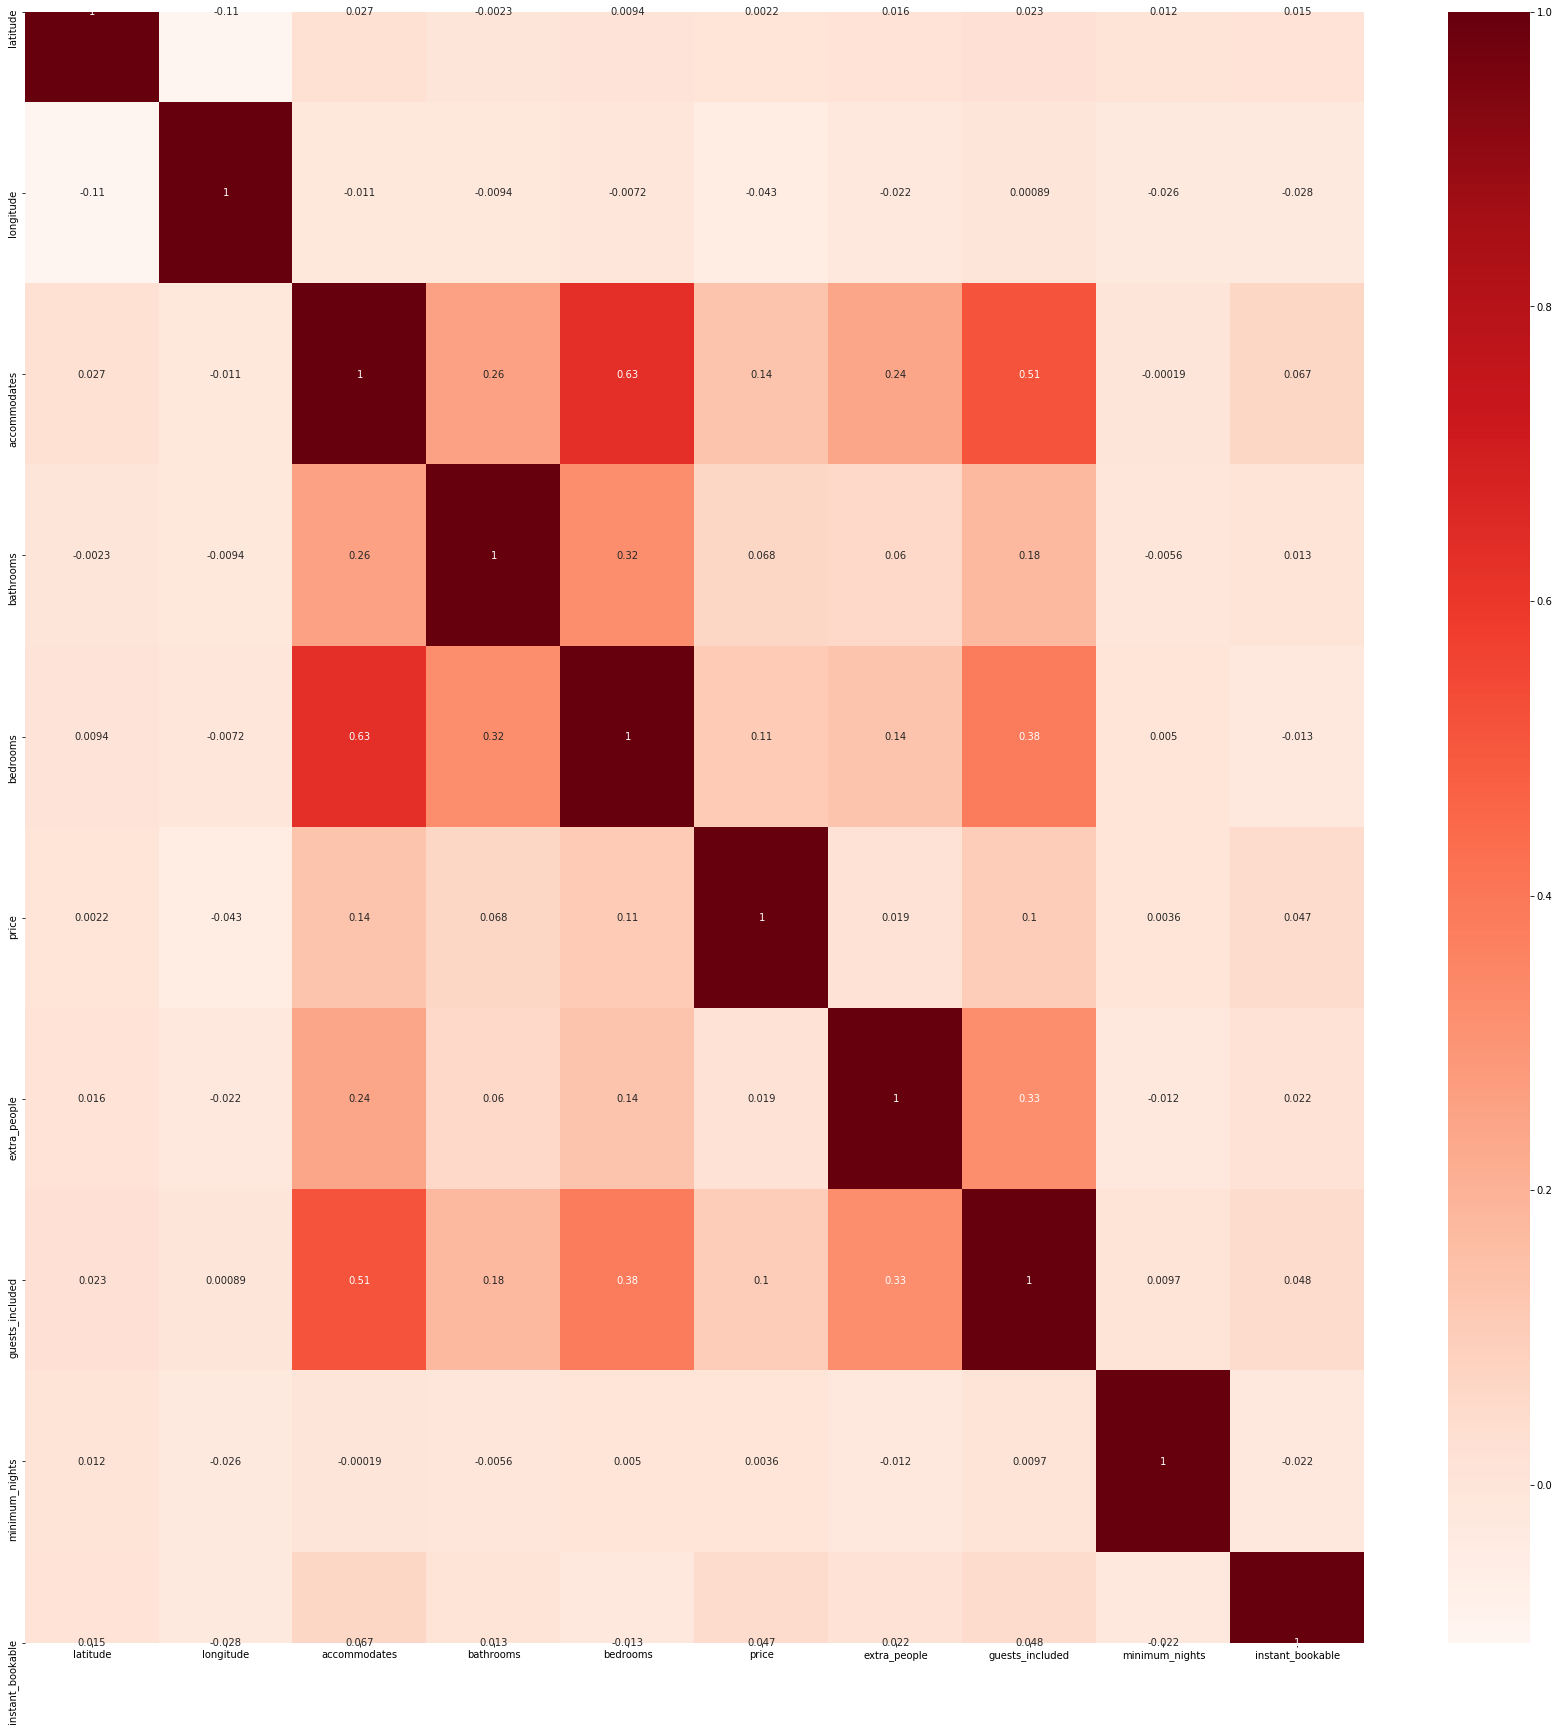

In [41]:
plt.figure(figsize=(30,30))
cor = data_listings.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [42]:
data_listings['size'] = data_listings['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
data_listings['size'][:10]

0     75 s
1     25 s
2      68m
3     26 s
4     20 s
5    780 s
6      NaN
7     55 s
8     80 m
9     25 s
Name: size, dtype: object

In [44]:
data_listings['size'] = data_listings['size'].str.replace("\D", "")

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
# change datatype of size into float
data_listings['size'] = data_listings['size'].astype(float)

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
data_listings.head()

,host_is_superhost,description,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,cleaning_fee,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,size
0,True,Great location! 30 of 75 sq meters. This wood...,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60.0,$30.00,$200.00,28.0,1,4,False,False,strict_14_with_grace_period,75.0
1,False,In the summertime we are spending most of our ...,Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,$0.00,$0.00,0.0,1,2,False,False,flexible,25.0
2,False,This beautiful first floor apartment is situa...,Pankow,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,$50.00,$200.00,20.0,2,62,True,False,strict_14_with_grace_period,68.0
3,False,First of all: I prefer short-notice bookings. ...,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,2,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,$30.00,$250.00,18.0,1,5,False,False,strict_14_with_grace_period,26.0
4,True,Cozy and large room in the beautiful district ...,Pankow,52.543157,13.415091,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",42.0,$0.00,$0.00,24.0,1,2,False,False,moderate,20.0


In [47]:
data_listings.shape

(22552, 22)

In [48]:
data_listings['cleaning_fee'] = data_listings['cleaning_fee'].fillna('$0.00')

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
# fill 9361 security_deposit nan to 0
data_listings['security_deposit'] = data_listings['security_deposit'].fillna('$0.00')

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
data_listings['security_deposit'][:10]

0    $200.00
1      $0.00
2    $200.00
3    $250.00
4      $0.00
5    $400.00
6    $500.00
7      $0.00
8    $500.00
9      $0.00
Name: security_deposit, dtype: object

In [51]:
data_listings.drop(data_listings[ (data_listings['price'] > 400) | (data_listings['price'] == 0) ].index, axis=0, inplace=True)

/Users/julie/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
data_listings.isnull().sum()

host_is_superhost                  25
description                       202
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          32
bedrooms                           18
bed_type                            0
amenities                           0
price                               0
cleaning_fee                        0
security_deposit                    0
extra_people                        0
guests_included                     0
minimum_nights                      0
instant_bookable                    0
is_business_travel_ready            0
cancellation_policy                 0
size                            11744
dtype: int64

In [53]:
data_listings.drop(['description'],axis = 1, inplace=True)

In [54]:
data_listings = data_listings[data_listings['bathrooms'].notnull()]
data_listings = data_listings[data_listings['host_is_superhost'].notnull()]
data_listings = data_listings[data_listings['bedrooms'].notnull()]



In [55]:
data_listings.isnull().sum()

host_is_superhost                   0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
bed_type                            0
amenities                           0
price                               0
cleaning_fee                        0
security_deposit                    0
extra_people                        0
guests_included                     0
minimum_nights                      0
instant_bookable                    0
is_business_travel_ready            0
cancellation_policy                 0
size                            11707
dtype: int64

In [56]:
!pip install geopy

In [57]:
from geopy.distance import great_circle

def distance_to_mid(lat, lon):
    berlin_centre = (52.5200, 13.4050)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

data_listings['distance'] = data_listings.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

In [58]:
data_listings['distance'][:10]

0    1.624906
1    3.170627
2    1.872072
3    4.456289
4    2.663910
5    1.630328
6    3.096617
7    3.728568
8    2.647484
9    1.139706
Name: distance, dtype: float64

In [60]:
data_listings.security_deposit = data_listings.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)


In [61]:
data_listings.cleaning_fee = data_listings.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)

In [65]:
data_listings.dtypes

host_is_superhost                object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
bed_type                         object
amenities                        object
price                           float64
cleaning_fee                    float64
security_deposit                float64
extra_people                    float64
guests_included                   int64
minimum_nights                    int64
instant_bookable                   bool
is_business_travel_ready         object
cancellation_policy              object
size                            float64
distance                        float64
dtype: object

In [67]:
data_listings.price[:10]

0     60.0
1     17.0
2     90.0
3     26.0
4     42.0
5    180.0
6     70.0
7    120.0
8     90.0
9     45.0
Name: price, dtype: float64

In [71]:
sub_df = data_listings[['accommodates', 'bathrooms', 'bedrooms',  'price', 'cleaning_fee', 
                 'security_deposit', 'extra_people', 'guests_included', 'distance', 'size']]

In [72]:
train_data = sub_df[sub_df['size'].notnull()]
test_data  = sub_df[sub_df['size'].isnull()]

# define X
X_train = train_data.drop('size', axis=1)
X_test  = test_data.drop('size', axis=1)

# define y
y_train = train_data['size']


In [73]:
# import Linear Regression
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()



In [84]:
# fit model to training data
linreg.fit(X_train, y_train)

y_test = linreg.predict(X_test)

In [85]:
y_test[:10]

array([57.17412655, 97.14798757, 74.48057283, 87.14362893, 61.58143726,
       54.29813308, 64.48115098, 52.77128376, 45.85871145, 82.33385931])

In [86]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['size']

In [87]:
y_test[:5]

,size
0,57.174127
1,97.147988
2,74.480573
3,87.143629
4,61.581437


In [88]:
# make the index of X_test to an own dataframe
pre_index = pd.DataFrame(X_test.index)
pre_index.columns = ['pre_index']

# ... and concat this dataframe with y_test
y_test = pd.concat([y_test, pre_index], axis=1)
y_test.set_index(['pre_index'], inplace=True)

In [89]:
y_test.head()

,size
pre_index,
6,57.174127
11,97.147988
12,74.480573
13,87.143629
19,61.581437


In [90]:
new_test_data = pd.concat([X_test, y_test], axis=1)

In [91]:
sub_df_new = pd.concat([new_test_data, train_data], axis=0)

In [92]:
data_listings.drop(['accommodates', 'bathrooms', 'bedrooms', 'price', 'cleaning_fee', 
             'security_deposit', 'extra_people', 'guests_included', 'distance', 'size'], 
            axis=1, inplace=True)

In [174]:
df = pd.concat([sub_df_new, data_listings], axis=1)

In [175]:
df.head()

,accommodates,bathrooms,bedrooms,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bed_type,amenities,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy
0,3,1.0,1.0,60.0,30.0,200.0,28.0,1,1.624906,75.0,True,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4,False,False,strict_14_with_grace_period
1,2,1.0,1.0,17.0,0.0,0.0,0.0,1,3.170627,25.0,False,Pankow,52.548513,13.404553,Apartment,Private room,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2,False,False,flexible
2,4,1.0,1.0,90.0,50.0,200.0,20.0,2,1.872072,68.0,False,Pankow,52.534996,13.417579,Apartment,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",62,True,False,strict_14_with_grace_period
3,2,1.0,1.0,26.0,30.0,250.0,18.0,1,4.456289,26.0,False,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",5,False,False,strict_14_with_grace_period
4,2,1.0,1.0,42.0,0.0,0.0,24.0,1,2.663910,20.0,True,Pankow,52.543157,13.415091,Apartment,Private room,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",2,False,False,moderate


In [176]:
df.isnull().sum()

accommodates                    0
bathrooms                       0
bedrooms                        0
price                           0
cleaning_fee                    0
security_deposit                0
extra_people                    0
guests_included                 0
distance                        0
size                            0
host_is_superhost               0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
bed_type                        0
amenities                       0
minimum_nights                  0
instant_bookable                0
is_business_travel_ready        0
cancellation_policy             0
dtype: int64

In [177]:
df.shape

(22366, 22)

In [178]:
df['amenities']=df['amenities'].str.lower()
df['amenities'][:5]

0    {tv,"cable tv",wifi,kitchen,gym,heating,"famil...
1    {wifi,kitchen,elevator,heating,washer,essentia...
2    {internet,wifi,kitchen,"buzzer/wireless interc...
3    {internet,wifi,"pets allowed","pets live on th...
4    {wifi,heating,"family/kid friendly",essentials...
Name: amenities, dtype: object

In [179]:
df['amenities'] = df['amenities'].astype(str)

In [180]:
df['amenities'].value_counts().head(5)

{}                                                                              64
{internet,wifi,kitchen,heating,washer,essentials}                               56
{internet,wifi,kitchen,"buzzer/wireless intercom",heating,washer,essentials}    55
{internet,wifi,kitchen,heating,washer}                                          39
{internet,wifi,kitchen,"buzzer/wireless intercom",heating,washer}               35
Name: amenities, dtype: int64

In [181]:
new_cols = ['tv', 'wifi', 'kitchen','washer','dryer', 'heating','free parking', 'smoking allowed']

for col in new_cols:
    df[col] = 0
    df[col][df['amenities'].str.contains(col, na=False)] = 1
    

/Users/julie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [182]:
df.head()

,accommodates,bathrooms,bedrooms,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bed_type,amenities,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,tv,wifi,kitchen,washer,dryer,heating,free parking,smoking allowed
0,3,1.0,1.0,60.0,30.0,200.0,28.0,1,1.624906,75.0,True,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,Real Bed,"{tv,""cable tv"",wifi,kitchen,gym,heating,""famil...",4,False,False,strict_14_with_grace_period,1,1,1,1,1,1,0,0
1,2,1.0,1.0,17.0,0.0,0.0,0.0,1,3.170627,25.0,False,Pankow,52.548513,13.404553,Apartment,Private room,Real Bed,"{wifi,kitchen,elevator,heating,washer,essentia...",2,False,False,flexible,0,1,1,1,1,1,0,0
2,4,1.0,1.0,90.0,50.0,200.0,20.0,2,1.872072,68.0,False,Pankow,52.534996,13.417579,Apartment,Entire home/apt,Real Bed,"{internet,wifi,kitchen,""buzzer/wireless interc...",62,True,False,strict_14_with_grace_period,0,1,1,1,1,1,0,0
3,2,1.0,1.0,26.0,30.0,250.0,18.0,1,4.456289,26.0,False,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,Pull-out Sofa,"{internet,wifi,""pets allowed"",""pets live on th...",5,False,False,strict_14_with_grace_period,0,1,0,1,1,1,0,0
4,2,1.0,1.0,42.0,0.0,0.0,24.0,1,2.663910,20.0,True,Pankow,52.543157,13.415091,Apartment,Private room,Real Bed,"{wifi,heating,""family/kid friendly"",essentials...",2,False,False,moderate,0,1,0,0,1,1,0,0


In [183]:
df.dtypes

accommodates                      int64
bathrooms                       float64
bedrooms                        float64
price                           float64
cleaning_fee                    float64
security_deposit                float64
extra_people                    float64
guests_included                   int64
distance                        float64
size                            float64
host_is_superhost                object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
bed_type                         object
amenities                        object
minimum_nights                    int64
instant_bookable                   bool
is_business_travel_ready         object
cancellation_policy              object
tv                                int64
wifi                              int64
kitchen                           int64


In [185]:
df.to_csv("cleaned_data.csv")